<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Data Visualization
</div>

## **Thông tin nhóm**

#### Thành viên 1:
##### * **Họ và tên:** Võ Duy Anh
##### * **MSSV:** 21127221

#### Thành viên 2:
##### * **Họ và tên:** Nguyễn Mậu Gia Bảo
##### * **MSSV:** 21127583

#### Thành viên 3:
##### * **Họ và tên:** Vũ Minh Phát
##### * **MSSV:** 21127739

### **Thư viện hỗ trợ**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### **1. Giới thiệu về bộ dữ liệu**

### **2. Khám phá dữ liệu**

#### Đọc dữ liệu từ file

In [2]:
data = pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### 📌 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [3]:
row,col = data.shape
print(f'Dữ liệu có {row} hàng và {col} cột')

Dữ liệu có 119390 hàng và 32 cột


#### 📌 Ý nghĩa của mỗi hàng là gì?

Biểu diễn một đơn đặt phòng khách sạn cụ thể

####  📌 Dữ liệu có các dòng bị lặp không?

In [4]:
detectDupSeries = data.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

if num_duplicated_rows == 0:
    print("Dữ liệu không có dòng bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị trùng lặp.")

Dữ liệu có 31994 dòng bị trùng lặp.


In [5]:
duplicate_ratio = num_duplicated_rows / len(data)
print(f"Tỷ lệ trùng lặp của dữ liệu là: {duplicate_ratio:.2%}")

Tỷ lệ trùng lặp của dữ liệu là: 26.80%


Nhìn chung, với tỉ lệ trùng lặp hơn 26% có thể thấy bộ dữ liệu đang có tỉ lệ trùng lặp khá lớn

Loại bỏ các dòng trùng lặp

In [6]:
data = data.drop_duplicates()

#### 📌 Ý nghĩa của mỗi cột là gì?

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Cột</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-size: 14px; text-align: left;">1</td>
      <td style="font-size: 14px; text-align: left;">hotel</td>
      <td style="font-size: 14px; text-align: left;">Tên khách sạn</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">2</td>
      <td style="font-size: 14px; text-align: left;">is_canceled</td>
      <td style="font-size: 14px; text-align: left;">Cờ lệnh liệu đặt phòng đã bị hủy hay không (0 nếu không hủy, 1 nếu đã hủy).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">3</td>
      <td style="font-size: 14px; text-align: left;">lead_time</td>
      <td style="font-size: 14px; text-align: left;">Số ngày giữa ngày đặt phòng và ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">4</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_year</td>
      <td style="font-size: 14px; text-align: left;"> Năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">5</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_month</td>
      <td style="font-size: 14px; text-align: left;">Tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">6</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_week_number</td>
      <td style="font-size: 14px; text-align: left;">Tuần trong năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">7</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_day_of_month</td>
      <td style="font-size: 14px; text-align: left;">Ngày trong tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">8</td>
      <td style="font-size: 14px; text-align: left;">stays_in_weekend_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm lưu trú vào cuối tuần.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">9</td>
      <td style="font-size: 14px; text-align: left;">stays_in_week_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm lưu trú vào các ngày trong tuần.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">10</td>
      <td style="font-size: 14px; text-align: left;">adults</td>
      <td style="font-size: 14px; text-align: left;">Số người lớn.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">11</td>
      <td style="font-size: 14px; text-align: left;">children</td>
      <td style="font-size: 14px; text-align: left;">Số trẻ em.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">12</td>
      <td style="font-size: 14px; text-align: left;">babies</td>
      <td style="font-size: 14px; text-align: left;">Số em bé.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">13</td>
      <td style="font-size: 14px; text-align: left;">meal</td>
      <td style="font-size: 14px; text-align: left;">Loại bữa ăn.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">14</td>
      <td style="font-size: 14px; text-align: left;">country</td>
      <td style="font-size: 14px; text-align: left;">Quốc gia của khách hàng.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">15</td>
      <td style="font-size: 14px; text-align: left;">market_segment</td>
      <td style="font-size: 14px; text-align: left;">Phân đoạn thị trường.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">16</td>
      <td style="font-size: 14px; text-align: left;">distribution_channel</td>
      <td style="font-size: 14px; text-align: left;">Kênh phân phối.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">17</td>
      <td style="font-size: 14px; text-align: left;">is_repeated_guest</td>
      <td style="font-size: 14px; text-align: left;">Cờ lệnh thể hiện liệu khách hàng đã từng lưu trú trước đó hay không.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">18</td>
      <td style="font-size: 14px; text-align: left;">previous_cancellations</td>
      <td style="font-size: 14px; text-align: left;">Số lần hủy đặt phòng trước đó.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">19</td>
      <td style="font-size: 14px; text-align: left;">previous_bookings_not_canceled</td>
      <td style="font-size: 14px; text-align: left;">Số lần đặt phòng trước đó nhưng không bị hủy.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">20</td>
      <td style="font-size: 14px; text-align: left;">reserved_room_type</td>
      <td style="font-size: 14px; text-align: left;">Loại phòng đã đặt.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">21</td>
      <td style="font-size: 14px; text-align: left;">assigned_room_type</td>
      <td style="font-size: 14px; text-align: left;">Loại phòng được gán cho đơn đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">22</td>
      <td style="font-size: 14px; text-align: left;">booking_changes</td>
      <td style="font-size: 14px; text-align: left;">Số lần thay đổi đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">23</td>
      <td style="font-size: 14px; text-align: left;">deposit_type</td>
      <td style="font-size: 14px; text-align: left;">Loại tiền đặt cọc.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">24</td>
      <td style="font-size: 14px; text-align: left;">agent</td>
      <td style="font-size: 14px; text-align: left;">ID của đại lý đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">25</td>
      <td style="font-size: 14px; text-align: left;">company</td>
      <td style="font-size: 14px; text-align: left;">ID của công ty đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">26</td>
      <td style="font-size: 14px; text-align: left;">days_in_waiting_list</td>
      <td style="font-size: 14px; text-align: left;">Số ngày trong danh sách chờ.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">27</td>
      <td style="font-size: 14px; text-align: left;">customer_type</td>
      <td style="font-size: 14px; text-align: left;">Loại khách hàng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">28</td>
      <td style="font-size: 14px; text-align: left;">adr</td>
      <td style="font-size: 14px; text-align: left;">Giá trung bình hàng đêm (Average Daily Rate).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">29</td>
      <td style="font-size: 14px; text-align: left;">required_car_parking_spaces</td>
      <td style="font-size: 14px; text-align: left;">Số lượng chỗ đậu xe yêu cầu.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">30</td>
      <td style="font-size: 14px; text-align: left;">total_of_special_requests</td>
      <td style="font-size: 14px; text-align: left;">Tổng số yêu cầu đặc biệt.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">31</td>
      <td style="font-size: 14px; text-align: left;">reservation_status</td>
      <td style="font-size: 14px; text-align: left;">Trạng thái đặt phòng cuối cùng.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">32</td>
      <td style="font-size: 14px; text-align: left;">reservation_status_date</td>
      <td style="font-size: 14px; text-align: left;">Ngày cập nhật trạng thái đặt phòng cuối cùng.</td>
    </tr>
  </tbody>
</table>

#### 📌 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

- `is_canceled` là cờ lệnh để thể hiện liệu đặt phòng có bị huỷ hay không, do đó cần chuyển về object để phân vào categorical.
- `children` chỉ số lượng trẻ em, do đó cần chuyển về dạng int64. Tuy nhiên vì dữ liệu đang chứa NULL, do đó sẽ chuyển về dạng int64 sau khi fill missing value.
- `is_repeated_guest` là cờ lệnh để thể hiện khách hàng có từng lưu trú ở đó không, do đó cần chuyển về object để phân vào categorical.
- `reservation_status_date` biểu diễn cho ngày cập nhật trạng thái đặt phòng cuối cùng, do đó cần chuyển về dạng datetime.

In [8]:
data['is_canceled'] = data['is_canceled'].astype(str)
data['is_repeated_guest'] = data['is_repeated_guest'].astype(str)
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

#### 📌 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu số, nhóm sẽ tính toán một số thống kê cơ bản:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max


In [9]:
num_col_info_df = data.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.004577,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


- Cột `company` có tỉ lệ thiếu rất cao, lên đến hơn 90% (94.306893%), do đó nhóm sẽ tiến hành loại bỏ cột này.
- Cột `children` với tỉ lệ thiếu nhỏ, nhóm điền bằng giá trị mode của thuộc tính này.
- Cột `agent` với tỉ lệ thiếu khá cao, nhóm điền bằng giá trị median của thuộc tính này do giá trị của nó có phân bố rộng.

In [10]:
data.drop('company', axis=1, inplace=True)
data['children'].fillna(data['children'].mode()[0], inplace=True)
data['agent'].fillna(data['agent'].median(), inplace=True)
data['children'] = data['children'].astype(np.int64)

In [11]:
# TEST
data.select_dtypes(exclude=['object', 'bool']).agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.0,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


#### 📌 Đối với mỗi cột có kiểu dữ liệu không phải là số, các giá trị được phân phối như thế nào?

📚 Đối với các cột có kiểu dữ liệu không phải là số, nhóm sẽ tính toán:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Số lượng giá trị khác nhau
- Hiển thị một vài giá trị và phần trăm (từ 0 đến 100) của từng giá trị


In [12]:
cat_col_info_df = data.select_dtypes(include=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def num_values(s):
    return len(s.value_counts())

def value_ratios(s):
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.517186,177,"{'PRT': 31.6, 'GBR': 12.0, 'FRA': 10.2, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


Cột `country` với tỉ lệ thiếu là 0.517186% , không đáng kể, do đó nhóm sẽ  điền giá trị thiếu bằng giá trị mode của cột.

In [13]:
data['country'].fillna(data['country'].mode()[0], inplace=True)

In [14]:
# TEST
data.select_dtypes(include=['object', 'bool'])\
    .agg([missing_ratio, num_values, value_ratios]).T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.0,177,"{'PRT': 31.9, 'GBR': 11.9, 'FRA': 10.1, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  object        
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

Lấy 5 dữ liệu ra làm mẫu

In [16]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
86599,City Hotel,0,78,2016,March,14,31,2,4,2,...,0,No Deposit,9.0,0,Transient,82.45,0,1,Check-Out,2016-04-06
114573,City Hotel,0,136,2017,June,24,17,2,5,2,...,0,No Deposit,9.0,0,Transient,99.00,0,1,Check-Out,2017-06-24
79628,City Hotel,0,28,2015,October,44,29,0,2,1,...,0,No Deposit,63.0,0,Transient-Party,75.00,0,0,Check-Out,2015-10-31
18809,Resort Hotel,0,4,2015,November,48,27,0,2,2,...,0,No Deposit,240.0,0,Transient,48.00,0,2,Check-Out,2015-11-29
6696,Resort Hotel,1,24,2016,June,26,25,1,1,1,...,0,No Deposit,240.0,0,Transient,120.00,0,0,Canceled,2016-06-10


### **3. EDA 1D**

#### Chia loại dữ liệu theo kiểu Numerical và Categorical

In [17]:
num_col_df = data.select_dtypes(exclude=['object', 'bool'])
cat_col_df = data.select_dtypes(include=['object', 'bool'])

Numerical

In [18]:
num_col_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,342,2015,27,1,0,0,2,0,0,0,0,3,14.0,0,0.00,0,0,2015-07-01
1,737,2015,27,1,0,0,2,0,0,0,0,4,14.0,0,0.00,0,0,2015-07-01
2,7,2015,27,1,0,1,1,0,0,0,0,0,14.0,0,75.00,0,0,2015-07-02
3,13,2015,27,1,0,1,1,0,0,0,0,0,304.0,0,75.00,0,0,2015-07-02
4,14,2015,27,1,0,2,2,0,0,0,0,0,240.0,0,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0,0,0,0,0,394.0,0,96.14,0,0,2017-09-06
119386,102,2017,35,31,2,5,3,0,0,0,0,0,9.0,0,225.43,0,2,2017-09-07
119387,34,2017,35,31,2,5,2,0,0,0,0,0,9.0,0,157.71,0,4,2017-09-07
119388,109,2017,35,31,2,5,2,0,0,0,0,0,89.0,0,104.40,0,0,2017-09-07


Categorical

In [19]:
cat_col_df

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,0,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,0,July,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,0,July,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,August,BB,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,0,August,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,0,August,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,0,August,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out


#### Phân tích tỷ lệ đối với biến Cate

##### Đối với thuộc tính `hotel`

In [41]:
hotel_ratios = cat_col_df['hotel'].value_counts(normalize=True) * 100
hotel_ratios = hotel_ratios.round(2)  
hotel_ratios.reset_index()

,hotel,proportion
0,City Hotel,61.13
1,Resort Hotel,38.87


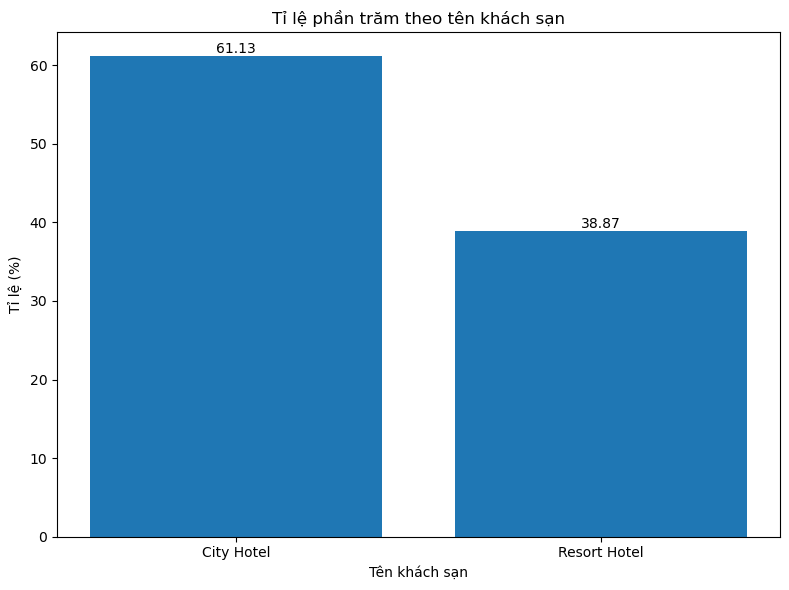

In [99]:
plt.figure(figsize=(8, 6))  
plt.bar(hotel_ratios.index, hotel_ratios.values)
plt.title('Tỉ lệ phần trăm theo tên khách sạn')
plt.xlabel('Tên khách sạn')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(hotel_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `is_canceled`

In [42]:
is_canceled_ratios = cat_col_df['is_canceled'].value_counts(normalize=True) * 100
is_canceled_ratios = is_canceled_ratios.round(2)  
is_canceled_ratios.reset_index()

,is_canceled,proportion
0,0,72.51
1,1,27.49


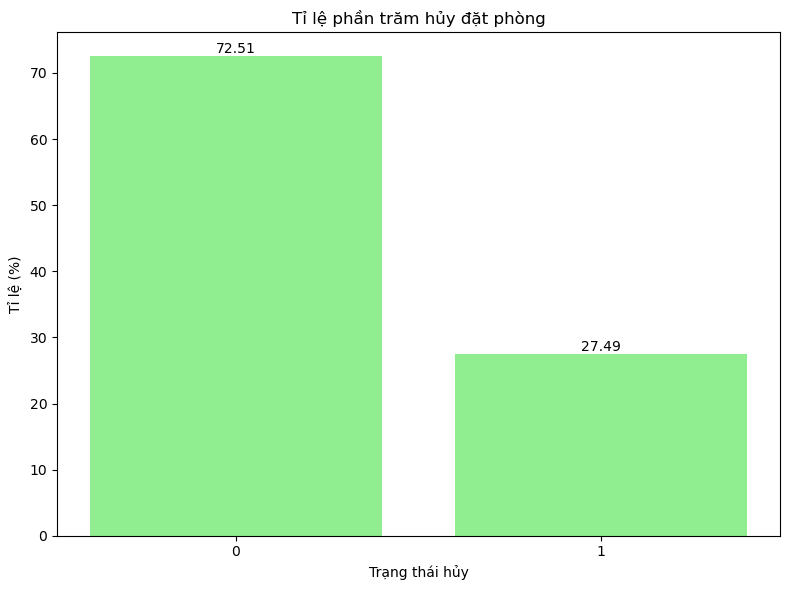

In [98]:
plt.figure(figsize=(8, 6)) 
plt.bar(is_canceled_ratios.index, is_canceled_ratios.values, color='lightgreen')

plt.title('Tỉ lệ phần trăm hủy đặt phòng')
plt.xlabel('Trạng thái hủy')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(is_canceled_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `arrival_date_month`

In [43]:
arrival_date_month_ratios = cat_col_df['arrival_date_month'].value_counts(normalize=True) * 100
arrival_date_month_ratios = arrival_date_month_ratios.round(2) 
arrival_date_month_ratios.reset_index()

,arrival_date_month,proportion
0,August,12.88
1,July,11.51
2,May,9.56
3,April,9.05
4,June,8.88
5,March,8.60
6,October,7.93
7,September,7.65
8,February,6.98
9,December,5.87


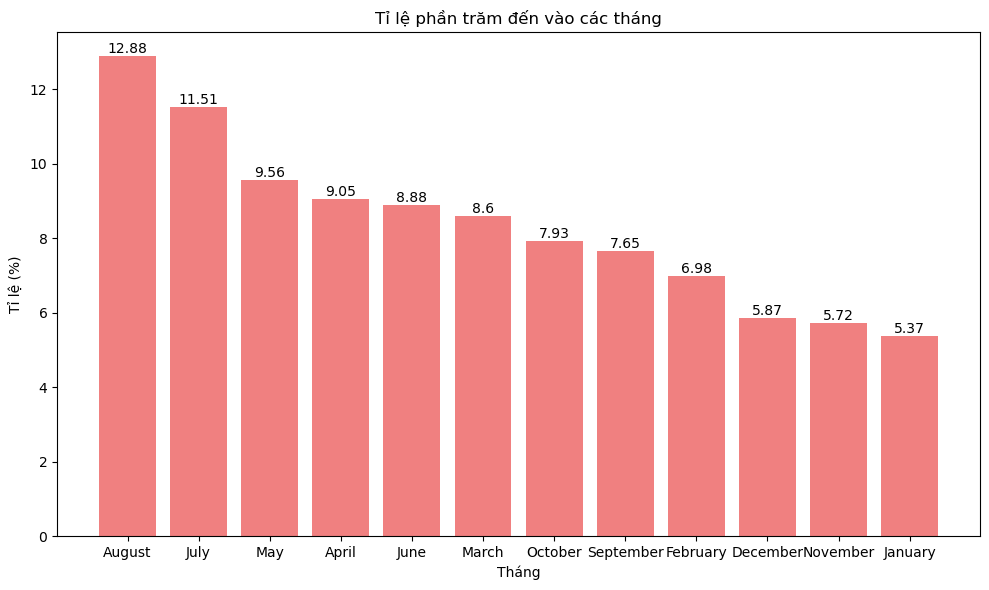

In [97]:
plt.figure(figsize=(10, 6))  
plt.bar(arrival_date_month_ratios.index, arrival_date_month_ratios.values, color='lightcoral')

plt.title('Tỉ lệ phần trăm đến vào các tháng')
plt.xlabel('Tháng')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(arrival_date_month_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `meal`

In [44]:
meal_ratios = cat_col_df['meal'].value_counts(normalize=True) * 100
meal_ratios = meal_ratios.round(2) 
meal_ratios.reset_index()

,meal,proportion
0,BB,77.78
1,SC,10.85
2,HB,10.40
3,Undefined,0.56
4,FB,0.41


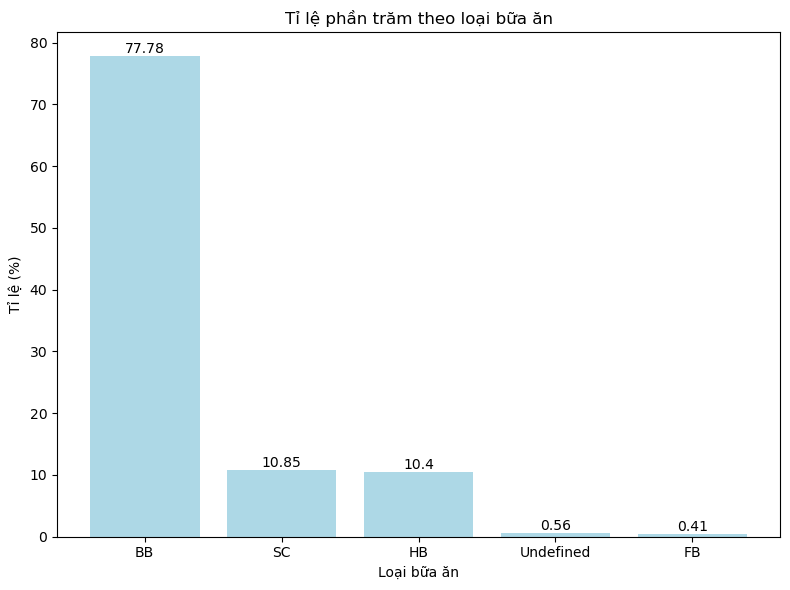

In [96]:
plt.figure(figsize=(8, 6))  
plt.bar(meal_ratios.index, meal_ratios.values, color='lightblue')

plt.title('Tỉ lệ phần trăm theo loại bữa ăn')
plt.xlabel('Loại bữa ăn')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(meal_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `country`

In [45]:
country_ratios = cat_col_df['country'].value_counts(normalize=True) * 100
country_ratios = country_ratios.round(2)
country_ratios.reset_index()

,country,proportion
0,PRT,31.93
1,GBR,11.94
2,FRA,10.11
3,ESP,8.30
4,DEU,6.16
...,...,...
172,MMR,0.00
173,BFA,0.00
174,CYM,0.00
175,MLI,0.00


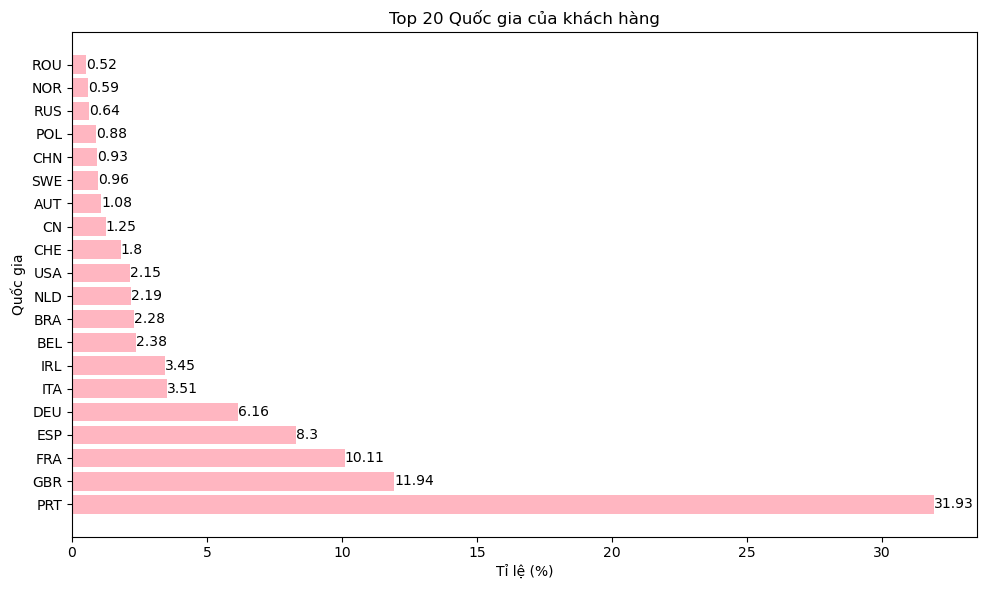

In [95]:
top_countries_ratios = country_ratios.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_countries_ratios.index, top_countries_ratios.values, color='lightpink')

plt.title('Top 20 Quốc gia của khách hàng')
plt.xlabel('Tỉ lệ (%)')
plt.ylabel('Quốc gia')

for i, value in enumerate(top_countries_ratios.values):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

##### Đối với thuộc tính `market_segment`

In [46]:
market_segment_month_ratios = cat_col_df['market_segment'].value_counts(normalize=True) * 100
market_segment_month_ratios = market_segment_month_ratios.round(2)
market_segment_month_ratios.reset_index()

,market_segment,proportion
0,Online TA,59.06
1,Offline TA/TO,15.89
2,Direct,13.51
3,Groups,5.65
4,Corporate,4.82
5,Complementary,0.80
6,Aviation,0.26
7,Undefined,0.00


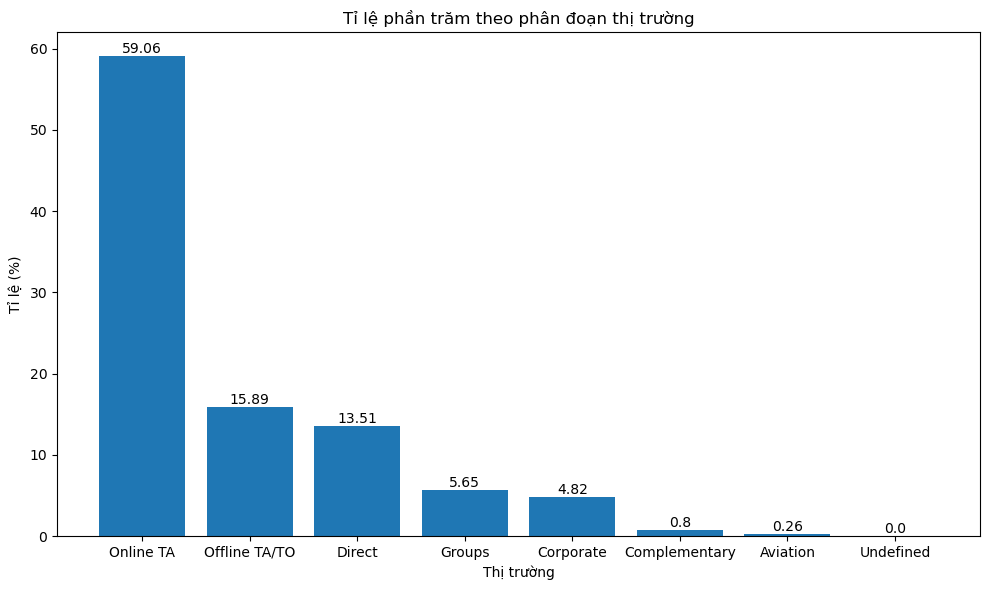

In [94]:
plt.figure(figsize=(10, 6))  
plt.bar(market_segment_month_ratios.index, market_segment_month_ratios.values)

plt.title('Tỉ lệ phần trăm theo phân đoạn thị trường')
plt.xlabel('Thị trường')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(market_segment_month_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `distribution_channel`

In [47]:
distribution_channel_ratios = cat_col_df['distribution_channel'].value_counts(normalize=True) * 100
distribution_channel_ratios = distribution_channel_ratios.round(2)
distribution_channel_ratios.reset_index()

,distribution_channel,proportion
0,TA/TO,79.11
1,Direct,14.86
2,Corporate,5.81
3,GDS,0.21
4,Undefined,0.01


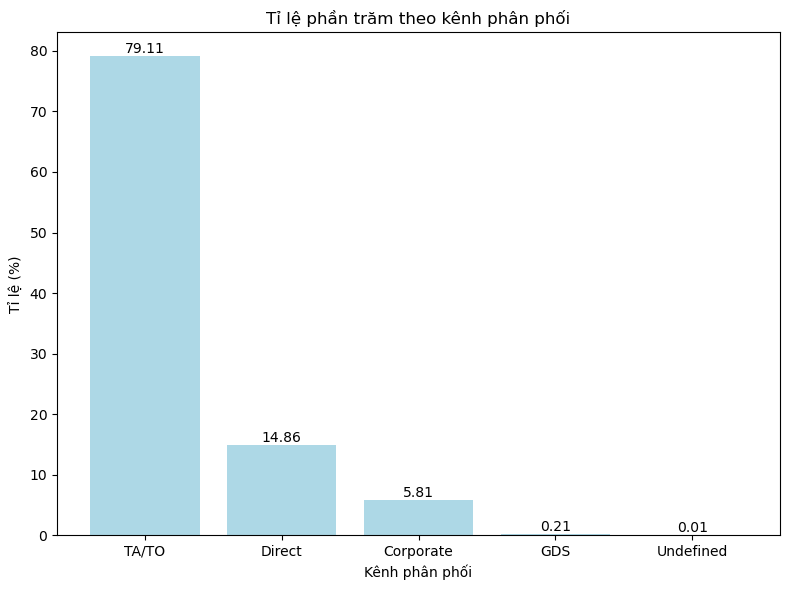

In [91]:
plt.figure(figsize=(8, 6))  
plt.bar(distribution_channel_ratios.index, distribution_channel_ratios.values, color='lightblue')

plt.title('Tỉ lệ phần trăm theo kênh phân phối')
plt.xlabel('Kênh phân phối')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(distribution_channel_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### Đối với thuộc tính `is_repeated_guest`

In [48]:
is_repeated_guest_ratios = cat_col_df['is_repeated_guest'].value_counts(normalize=True) * 100
is_repeated_guest_ratios = is_repeated_guest_ratios.round(2)
is_repeated_guest_ratios.reset_index()

,is_repeated_guest,proportion
0,0,96.09
1,1,3.91


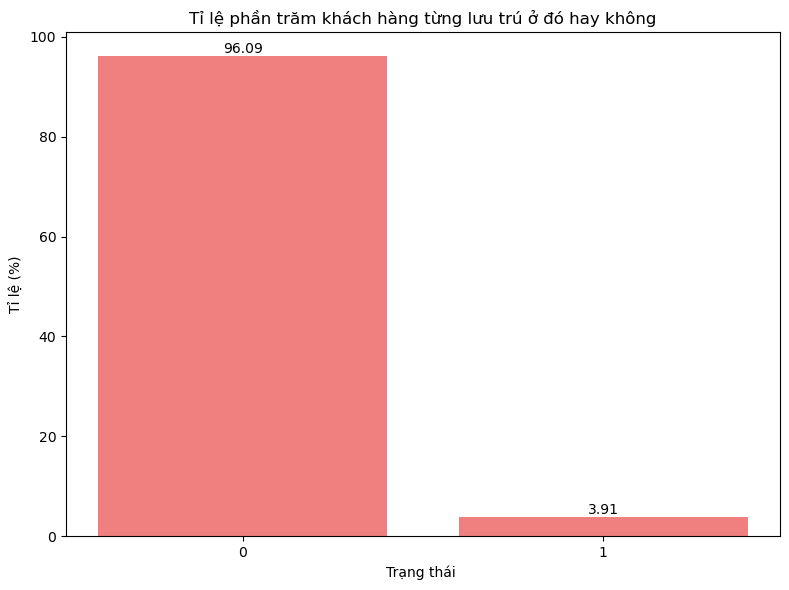

In [92]:
plt.figure(figsize=(8, 6))  
plt.bar(is_repeated_guest_ratios.index, is_repeated_guest_ratios.values, color='lightcoral')

plt.title('Tỉ lệ phần trăm khách hàng từng lưu trú ở đó hay không')
plt.xlabel('Trạng thái ')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(is_repeated_guest_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `reserved_room_type`

In [49]:
reserved_room_type_ratios = cat_col_df['reserved_room_type'].value_counts(normalize=True) * 100
reserved_room_type_ratios = reserved_room_type_ratios.round(2)
reserved_room_type_ratios.reset_index()

,reserved_room_type,proportion
0,A,64.71
1,D,19.91
2,E,6.92
3,F,3.23
4,G,2.35
5,B,1.14
6,C,1.05
7,H,0.68
8,L,0.01
9,P,0.01


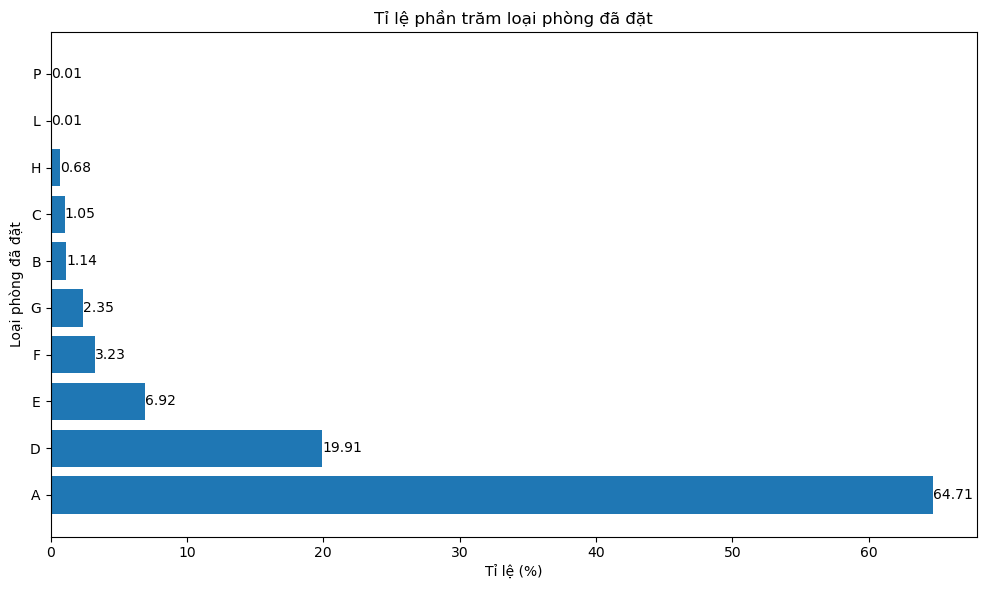

In [105]:
plt.figure(figsize=(10, 6)) 
plt.barh(reserved_room_type_ratios.index, reserved_room_type_ratios.values)

plt.title('Tỉ lệ phần trăm loại phòng đã đặt')
plt.xlabel('Tỉ lệ (%)')
plt.ylabel('Loại phòng đã đặt')

for i, value in enumerate(reserved_room_type_ratios.values):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `assigned_room_type`

In [50]:
assigned_room_type_ratios = cat_col_df['assigned_room_type'].value_counts(normalize=True) * 100
assigned_room_type_ratios = assigned_room_type_ratios.round(2)
assigned_room_type_ratios.reset_index()

,assigned_room_type,proportion
0,A,52.99
1,D,25.67
2,E,8.23
3,F,4.15
4,G,2.86
5,C,2.48
6,B,2.08
7,H,0.81
8,I,0.41
9,K,0.32


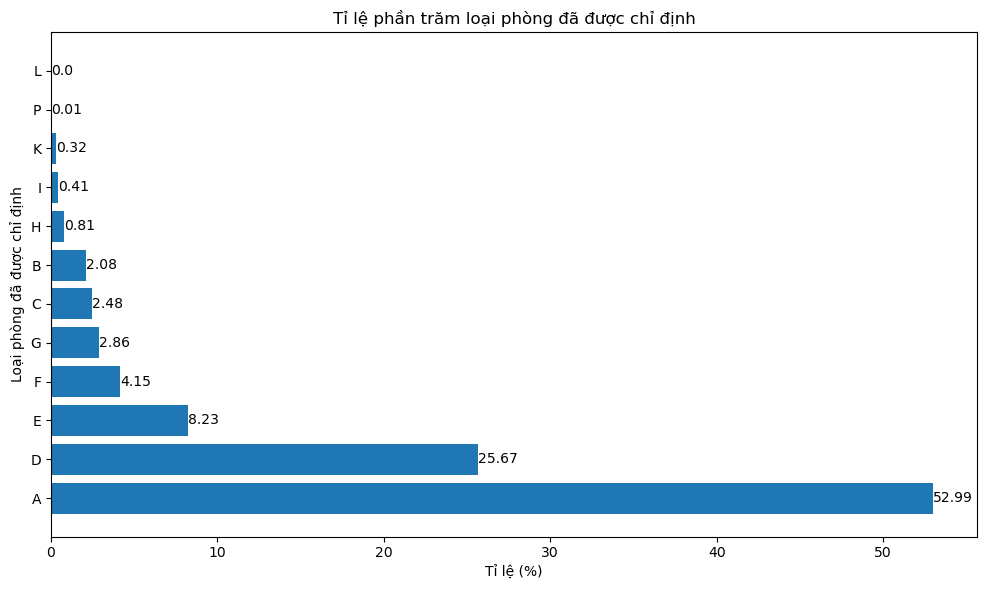

In [107]:
plt.figure(figsize=(10, 6))  
plt.barh(assigned_room_type_ratios.index, assigned_room_type_ratios.values)

plt.title('Tỉ lệ phần trăm loại phòng đã được chỉ định')
plt.xlabel('Tỉ lệ (%)')
plt.ylabel('Loại phòng đã được chỉ định')

for i, value in enumerate(assigned_room_type_ratios.values):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

##### Đối với thuộc tính `deposit_type`

In [51]:
deposit_type_ratios = cat_col_df['deposit_type'].value_counts(normalize=True) * 100
deposit_type_ratios = deposit_type_ratios.round(2)
deposit_type_ratios.reset_index()

,deposit_type,proportion
0,No Deposit,98.69
1,Non Refund,1.19
2,Refundable,0.12


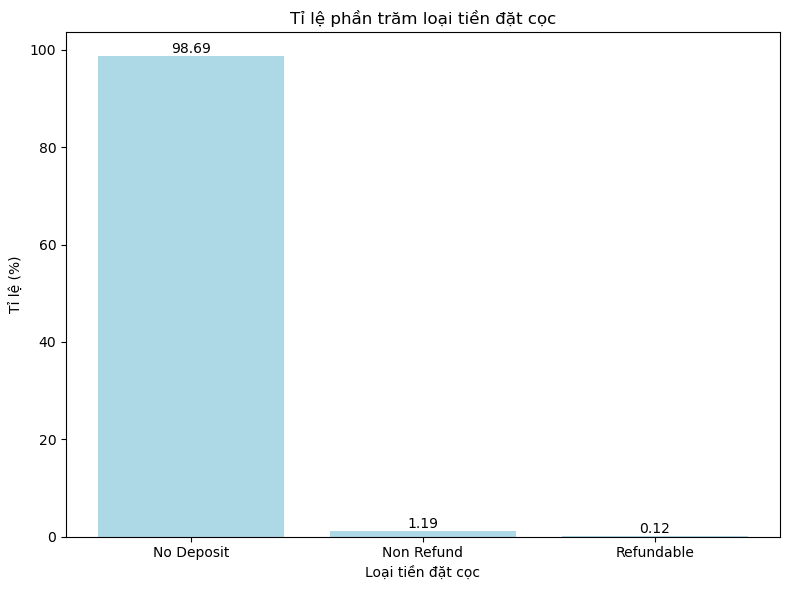

In [102]:
plt.figure(figsize=(8, 6))  
plt.bar(deposit_type_ratios.index, deposit_type_ratios.values, color='lightblue')

plt.title('Tỉ lệ phần trăm loại tiền đặt cọc')
plt.xlabel('Loại tiền đặt cọc')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(deposit_type_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `customer_type`

In [52]:
customer_type_ratios = cat_col_df['customer_type'].value_counts(normalize=True) * 100
customer_type_ratios = customer_type_ratios.round(2)
customer_type_ratios.reset_index()

,customer_type,proportion
0,Transient,82.37
1,Transient-Party,13.42
2,Contract,3.59
3,Group,0.62


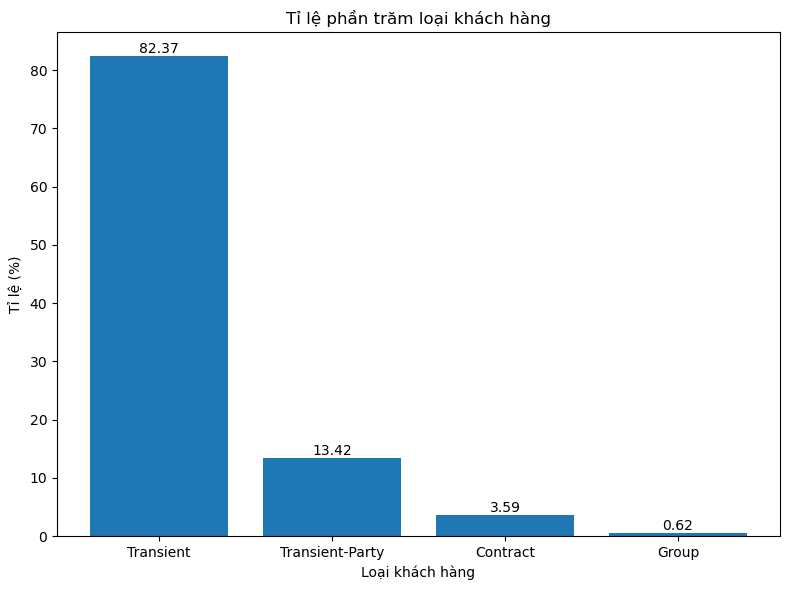

In [101]:
plt.figure(figsize=(8, 6))  
plt.bar(customer_type_ratios.index, customer_type_ratios.values)

plt.title('Tỉ lệ phần trăm loại khách hàng')
plt.xlabel('Loại khách hàng')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(customer_type_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

##### Đối với thuộc tính `reservation_status`

In [53]:
reservation_status_ratios = cat_col_df['reservation_status'].value_counts(normalize=True) * 100
reservation_status_ratios = reservation_status_ratios.round(2)
reservation_status_ratios.reset_index()

,reservation_status,proportion
0,Check-Out,72.51
1,Canceled,26.33
2,No-Show,1.16


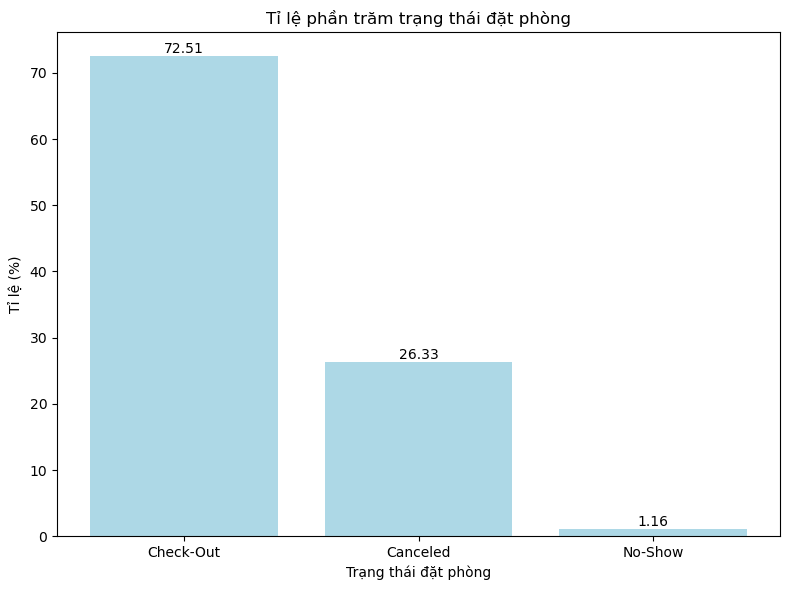

In [90]:
plt.figure(figsize=(8, 6))  
plt.bar(reservation_status_ratios.index, reservation_status_ratios.values, color='lightblue')

plt.title('Tỉ lệ phần trăm trạng thái đặt phòng')
plt.xlabel('Trạng thái đặt phòng')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(reservation_status_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

#### Phân tích phân phối đối với biến Num

##### Đối với thuộc tính `lead_time`

In [109]:
data['lead_time'].describe().reset_index()

,index,lead_time
0,count,87396.000000
1,mean,79.891368
2,std,86.052325
3,min,0.000000
4,25%,11.000000
5,50%,49.000000
6,75%,125.000000
7,max,737.000000


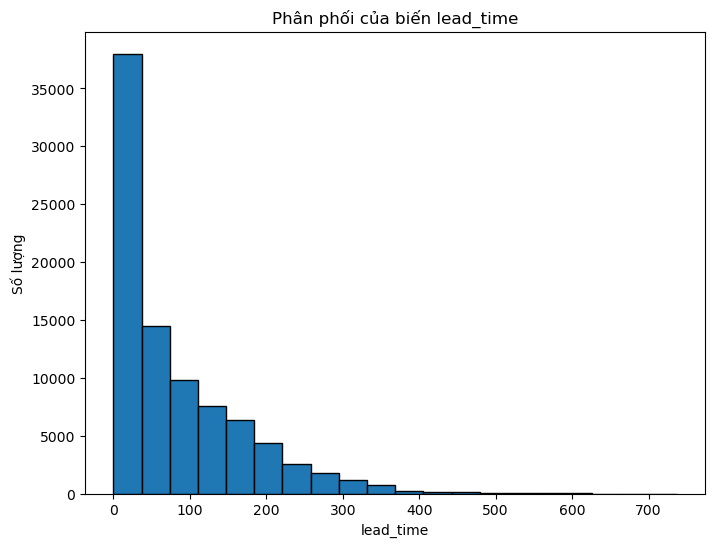

In [110]:
plt.figure(figsize=(8, 6))
plt.hist(data['lead_time'], bins=20, edgecolor='black')
plt.title('Phân phối của biến lead_time')
plt.xlabel('lead_time')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `arrival_date_year`

In [112]:
data['arrival_date_year'].describe().reset_index()

,index,arrival_date_year
0,count,87396.000000
1,mean,2016.210296
2,std,0.686102
3,min,2015.000000
4,25%,2016.000000
5,50%,2016.000000
6,75%,2017.000000
7,max,2017.000000


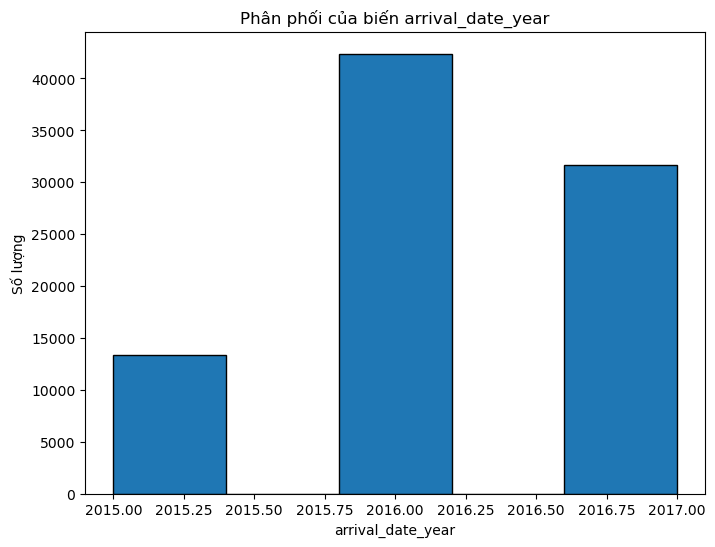

In [130]:
plt.figure(figsize=(8, 6))
plt.hist(data['arrival_date_year'], bins=5, edgecolor='black')
plt.title('Phân phối của biến arrival_date_year')
plt.xlabel('arrival_date_year')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `arrival_date_week_number`

In [114]:
data['arrival_date_week_number'].describe().reset_index()

,index,arrival_date_week_number
0,count,87396.000000
1,mean,26.838334
2,std,13.674572
3,min,1.000000
4,25%,16.000000
5,50%,27.000000
6,75%,37.000000
7,max,53.000000


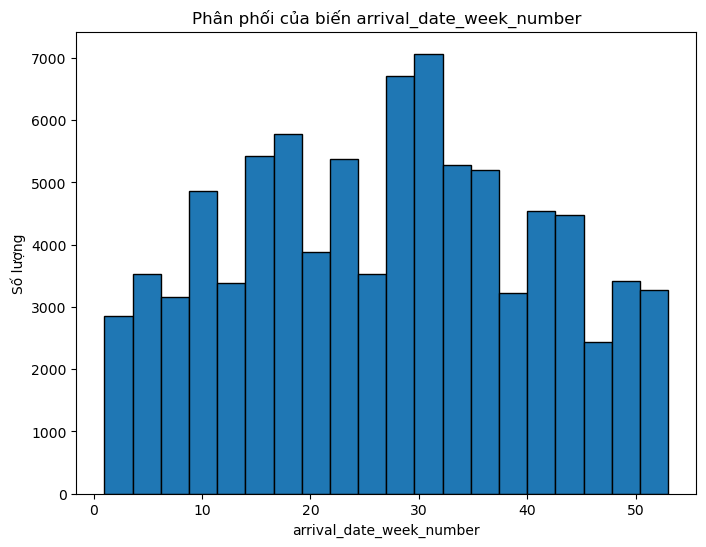

In [113]:
plt.figure(figsize=(8, 6))
plt.hist(data['arrival_date_week_number'], bins=20, edgecolor='black')
plt.title('Phân phối của biến arrival_date_week_number')
plt.xlabel('arrival_date_week_number')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `arrival_date_day_of_month`

In [115]:
data['arrival_date_day_of_month'].describe().reset_index()

,index,arrival_date_day_of_month
0,count,87396.000000
1,mean,15.815541
2,std,8.835146
3,min,1.000000
4,25%,8.000000
5,50%,16.000000
6,75%,23.000000
7,max,31.000000


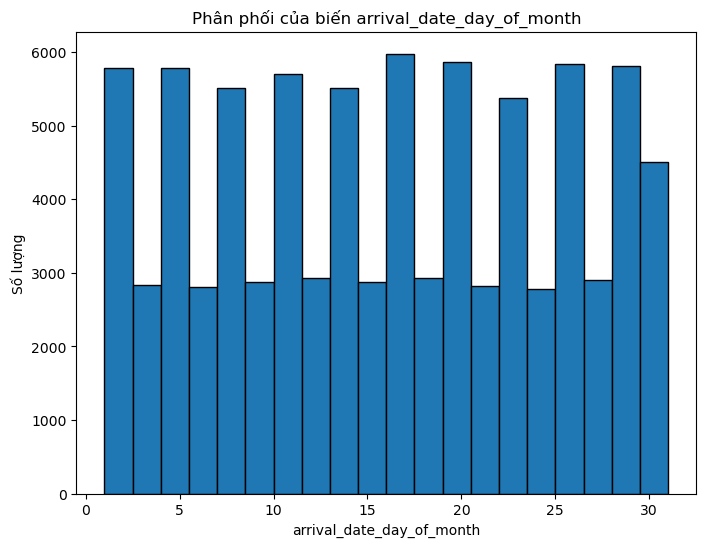

In [116]:
plt.figure(figsize=(8, 6))
plt.hist(data['arrival_date_day_of_month'], bins=20, edgecolor='black')
plt.title('Phân phối của biến arrival_date_day_of_month')
plt.xlabel('arrival_date_day_of_month')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `stays_in_weekend_nights`

In [117]:
data['stays_in_weekend_nights'].describe().reset_index()

,index,stays_in_weekend_nights
0,count,87396.000000
1,mean,1.005263
2,std,1.031921
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,2.000000
7,max,19.000000


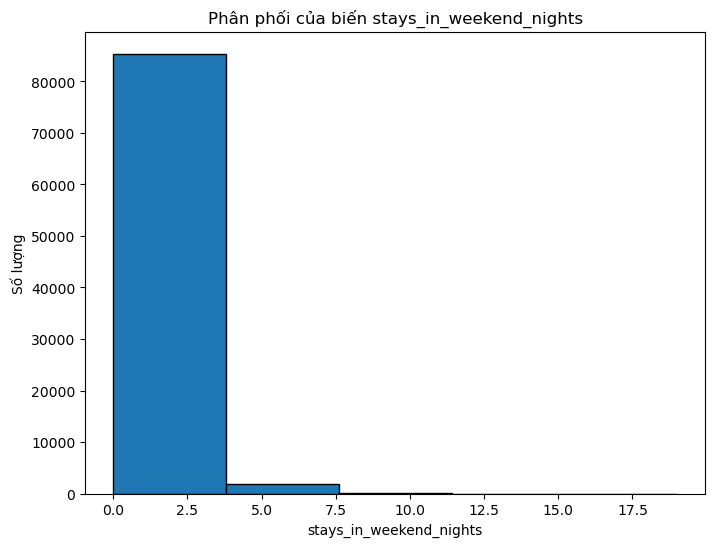

In [129]:
plt.figure(figsize=(8, 6))
plt.hist(data['stays_in_weekend_nights'], bins=5, edgecolor='black')
plt.title('Phân phối của biến stays_in_weekend_nights')
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `stays_in_week_nights`

In [120]:
data['stays_in_week_nights'].describe().reset_index()

,index,stays_in_week_nights
0,count,87396.000000
1,mean,2.625395
2,std,2.053584
3,min,0.000000
4,25%,1.000000
5,50%,2.000000
6,75%,4.000000
7,max,50.000000


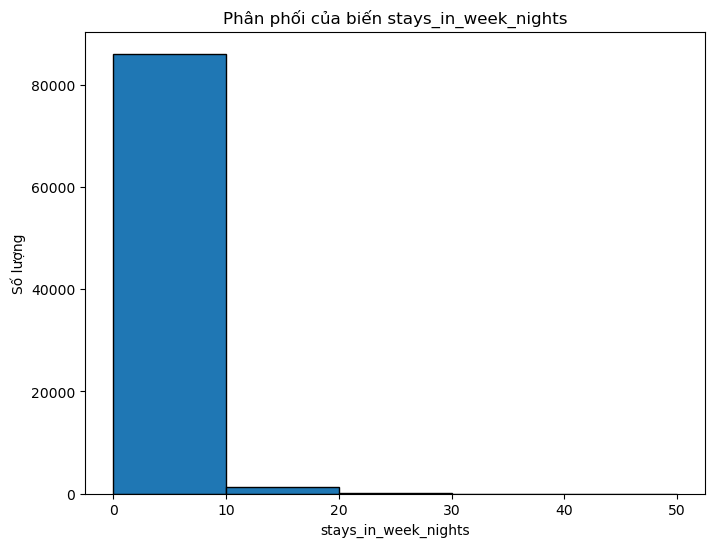

In [128]:
plt.figure(figsize=(8, 6))
plt.hist(data['stays_in_week_nights'], bins=5, edgecolor='black')
plt.title('Phân phối của biến stays_in_week_nights')
plt.xlabel('stays_in_week_nights')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `adults`

In [124]:
data['adults'].describe().reset_index()

,index,adults
0,count,87396.000000
1,mean,1.875795
2,std,0.626500
3,min,0.000000
4,25%,2.000000
5,50%,2.000000
6,75%,2.000000
7,max,55.000000


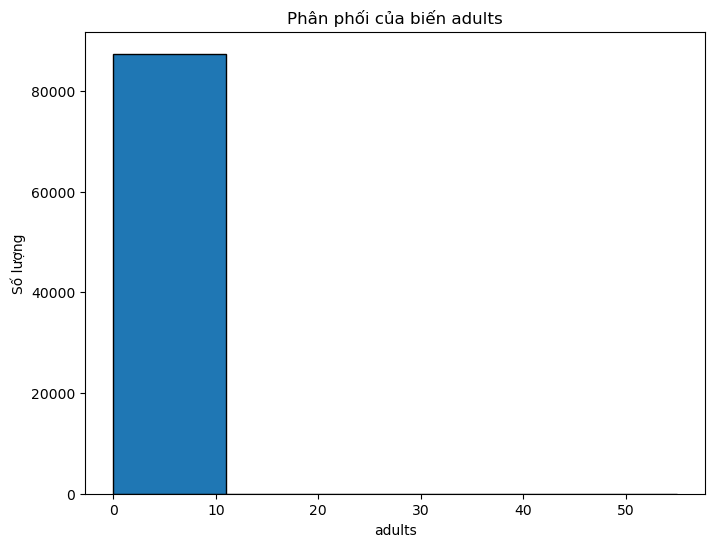

In [131]:
plt.figure(figsize=(8, 6))
plt.hist(data['adults'], bins=5, edgecolor='black')
plt.title('Phân phối của biến adults')
plt.xlabel('adults')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `children`

In [133]:
data['children'].describe().reset_index()

,index,children
0,count,87396.000000
1,mean,0.138633
2,std,0.455871
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,10.000000


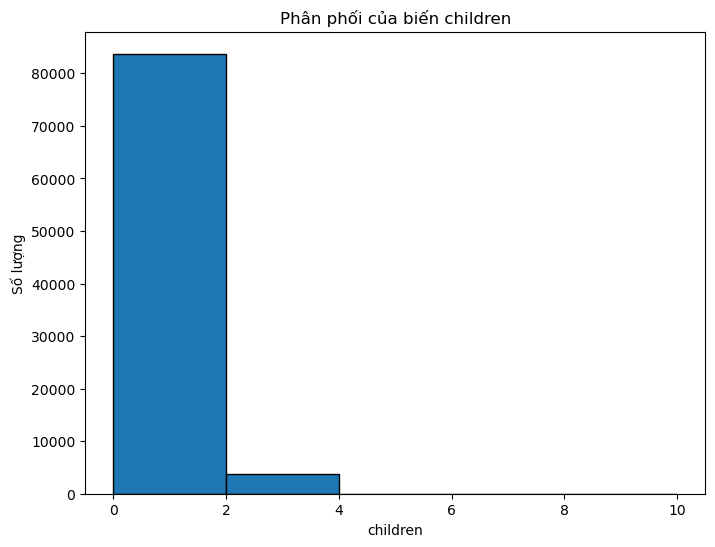

In [132]:
plt.figure(figsize=(8, 6))
plt.hist(data['children'], bins=5, edgecolor='black')
plt.title('Phân phối của biến children')
plt.xlabel('children')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `babies`

In [135]:
data['babies'].describe().reset_index()

,index,babies
0,count,87396.000000
1,mean,0.010824
2,std,0.113597
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,10.000000


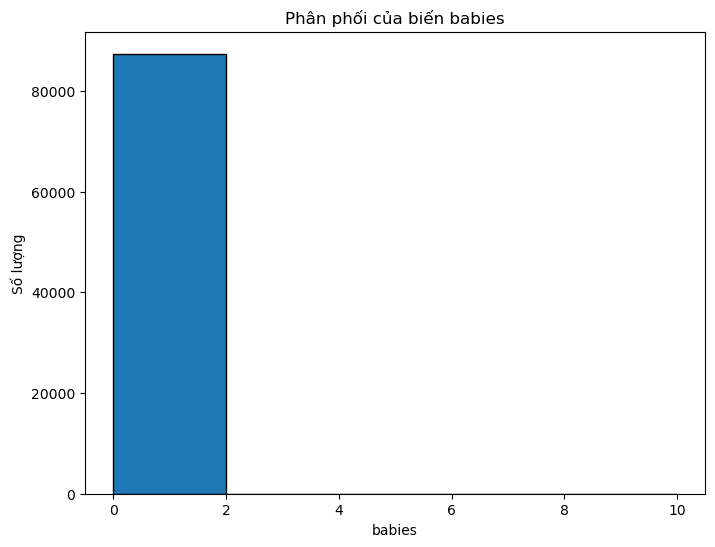

In [134]:
plt.figure(figsize=(8, 6))
plt.hist(data['babies'], bins=5, edgecolor='black')
plt.title('Phân phối của biến babies')
plt.xlabel('babies')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `previous_cancellations`

In [136]:
data['previous_cancellations'].describe().reset_index()

,index,previous_cancellations
0,count,87396.000000
1,mean,0.030413
2,std,0.369145
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,26.000000


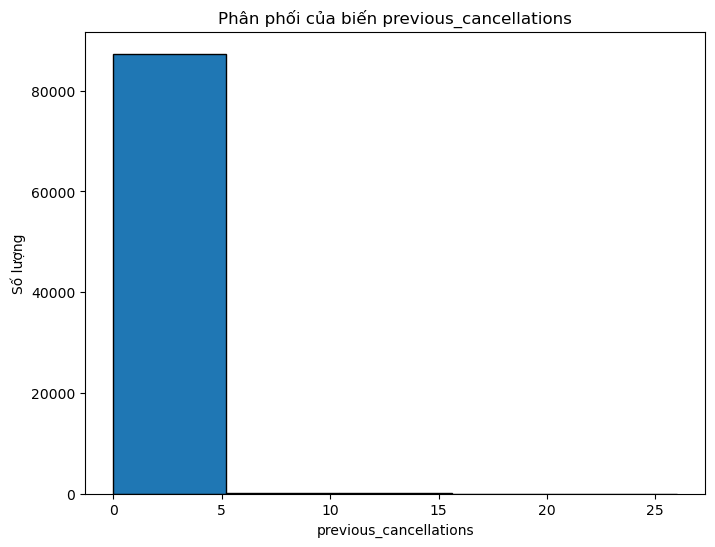

In [138]:
plt.figure(figsize=(8, 6))
plt.hist(data['previous_cancellations'], bins=5, edgecolor='black')
plt.title('Phân phối của biến previous_cancellations')
plt.xlabel('previous_cancellations')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `previous_bookings_not_canceled`

In [141]:
data['previous_bookings_not_canceled'].describe().reset_index()

,index,previous_bookings_not_canceled
0,count,87396.000000
1,mean,0.183990
2,std,1.731894
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,72.000000


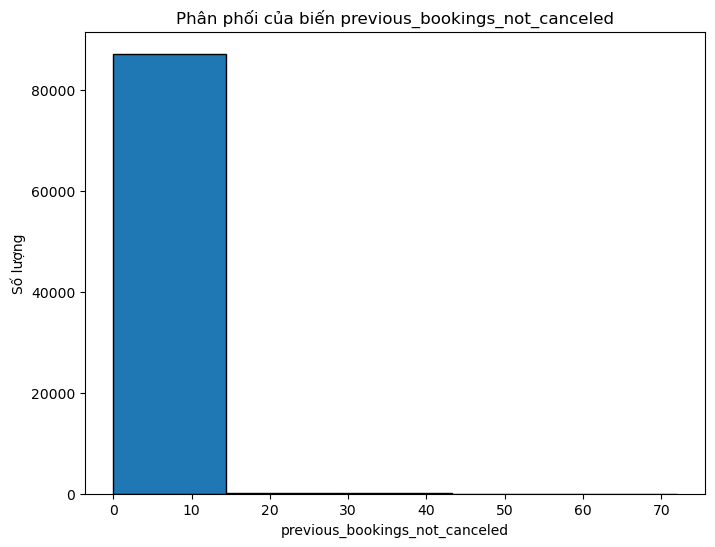

In [143]:
plt.figure(figsize=(8, 6))
plt.hist(data['previous_bookings_not_canceled'], bins=5, edgecolor='black')
plt.title('Phân phối của biến previous_bookings_not_canceled')
plt.xlabel('previous_bookings_not_canceled')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `booking_changes`

In [144]:
data['booking_changes'].describe().reset_index()

,index,booking_changes
0,count,87396.000000
1,mean,0.271603
2,std,0.727245
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,21.000000


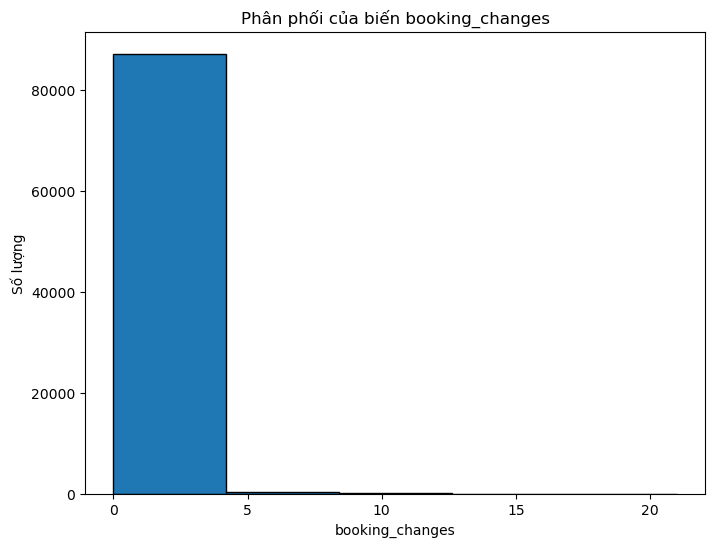

In [146]:
plt.figure(figsize=(8, 6))
plt.hist(data['booking_changes'], bins=5, edgecolor='black')
plt.title('Phân phối của biến booking_changes')
plt.xlabel('booking_changes')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `agent`

In [149]:
data['agent'].describe().reset_index()

,index,agent
0,count,87396.000000
1,mean,82.957858
2,std,108.605400
3,min,1.000000
4,25%,9.000000
5,50%,14.000000
6,75%,234.000000
7,max,535.000000


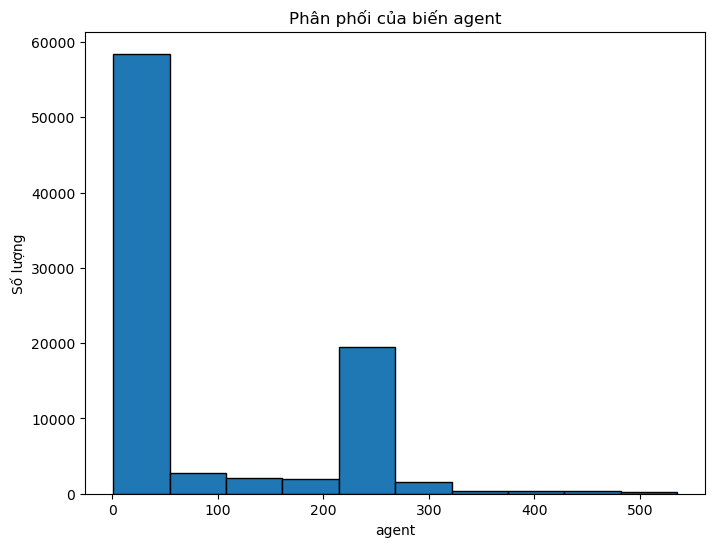

In [148]:
plt.figure(figsize=(8, 6))
plt.hist(data['agent'], bins=10, edgecolor='black')
plt.title('Phân phối của biến agent')
plt.xlabel('agent')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `days_in_waiting_list`

In [150]:
data['days_in_waiting_list'].describe().reset_index()

,index,days_in_waiting_list
0,count,87396.000000
1,mean,0.749565
2,std,10.015731
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,391.000000


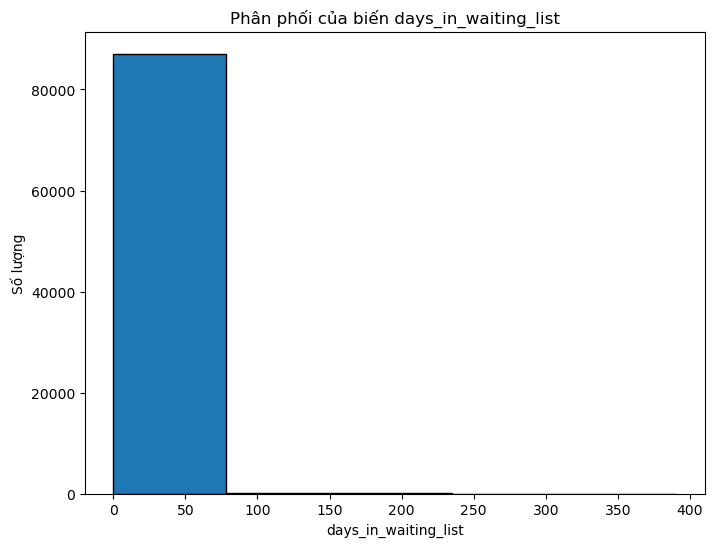

In [153]:
plt.figure(figsize=(8, 6))
plt.hist(data['days_in_waiting_list'], bins=5, edgecolor='black')
plt.title('Phân phối của biến days_in_waiting_list')
plt.xlabel('days_in_waiting_list')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `adr`

In [154]:
data['adr'].describe().reset_index()

,index,adr
0,count,87396.000000
1,mean,106.337246
2,std,55.013953
3,min,-6.380000
4,25%,72.000000
5,50%,98.100000
6,75%,134.000000
7,max,5400.000000


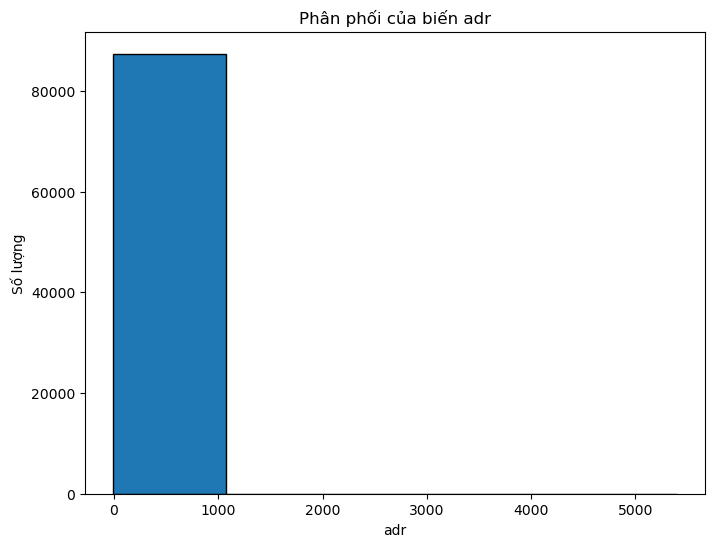

In [156]:
plt.figure(figsize=(8, 6))
plt.hist(data['adr'], bins=5, edgecolor='black')
plt.title('Phân phối của biến adr')
plt.xlabel('adr')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `required_car_parking_spaces`

In [157]:
data['required_car_parking_spaces'].describe().reset_index()

,index,required_car_parking_spaces
0,count,87396.000000
1,mean,0.084226
2,std,0.281533
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,8.000000


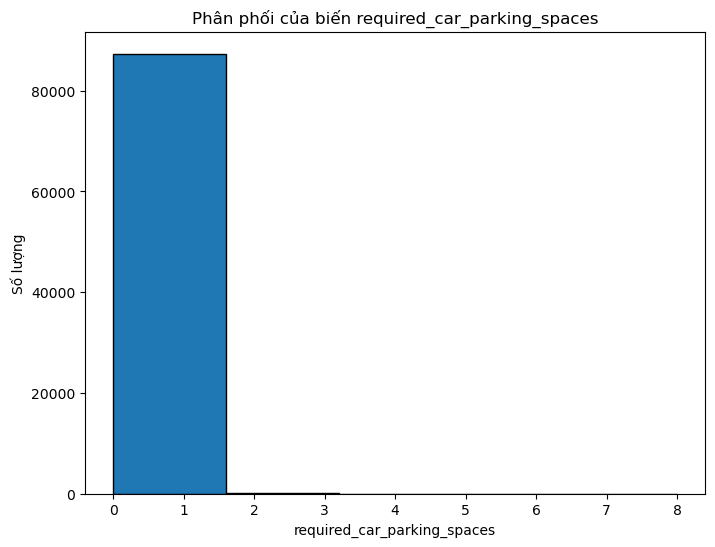

In [159]:
plt.figure(figsize=(8, 6))
plt.hist(data['required_car_parking_spaces'], bins=5, edgecolor='black')
plt.title('Phân phối của biến required_car_parking_spaces')
plt.xlabel('required_car_parking_spaces')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `total_of_special_requests`

In [162]:
data['total_of_special_requests'].describe().reset_index()

,index,total_of_special_requests
0,count,87396.000000
1,mean,0.698567
2,std,0.831946
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,1.000000
7,max,5.000000


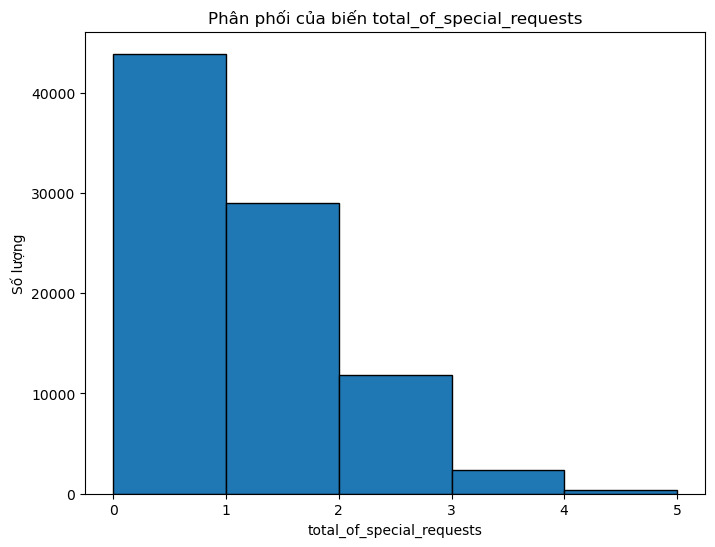

In [161]:
plt.figure(figsize=(8, 6))
plt.hist(data['total_of_special_requests'], bins=5, edgecolor='black')
plt.title('Phân phối của biến total_of_special_requests')
plt.xlabel('total_of_special_requests')
plt.ylabel('Số lượng')
plt.show()

##### Đối với thuộc tính `reservation_status_date`

In [163]:
data['reservation_status_date'].describe().reset_index()

,index,reservation_status_date
0,count,87396
1,mean,2016-08-31 03:44:08.963339520
2,min,2014-10-17 00:00:00
3,25%,2016-03-18 00:00:00
4,50%,2016-09-08 00:00:00
5,75%,2017-03-05 00:00:00
6,max,2017-09-14 00:00:00


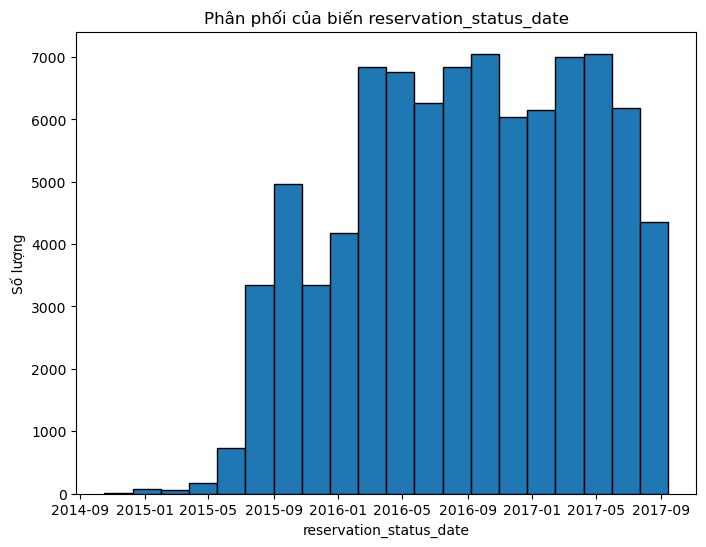

In [164]:
plt.figure(figsize=(8, 6))
plt.hist(data['reservation_status_date'], bins=20, edgecolor='black')
plt.title('Phân phối của biến reservation_status_date')
plt.xlabel('reservation_status_date')
plt.ylabel('Số lượng')
plt.show()

### **4. EDA 2D**

#### Phân tích hệ số tương quan của các biến Numerical

##### Bước 1: Tính ma trận hệ số tương quan

In [21]:
corr_matrix = num_col_df.corr()

In [22]:
corr_matrix

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
lead_time,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,0.005375,-0.078931,0.077028,0.072486,0.132152,0.023564,-0.086541,0.034240,0.114202
arrival_date_year,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,-0.054212,0.027256,0.008604,-0.004299,-0.027939,0.176088,-0.039807,0.064268,0.909016
arrival_date_week_number,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,0.007199,-0.020819,0.011902,0.019192,0.013843,0.098279,0.008946,0.046599,-0.163390
arrival_date_day_of_month,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.008538,0.000152,0.006307,0.006438,0.006588,0.022591,0.009167,-0.001651,0.028672
stays_in_weekend_nights,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.020636,-0.056653,0.050316,0.153424,-0.031680,0.038972,-0.042920,0.032396,0.004246
stays_in_week_nights,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.018781,-0.058503,0.085044,0.185665,0.001905,0.053298,-0.044303,0.037823,-0.002843
adults,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.042097,-0.120914,-0.048061,0.021480,-0.015740,0.248999,0.007802,0.112772,0.034441
children,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.019208,-0.029423,0.031313,0.040092,-0.020419,0.326293,0.036332,0.044596,0.041110
babies,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.005395,-0.009193,0.081035,0.029631,-0.006840,0.023446,0.030885,0.094820,-0.017382
previous_cancellations,0.005375,-0.054212,0.007199,-0.008538,-0.020636,-0.018781,-0.042097,-0.019208,-0.005395,1.000000,0.392064,-0.010269,-0.030087,0.003682,-0.050267,-0.003399,0.001871,-0.070222


Bước 2: Trực quan bằng biểu đồ Heatmap

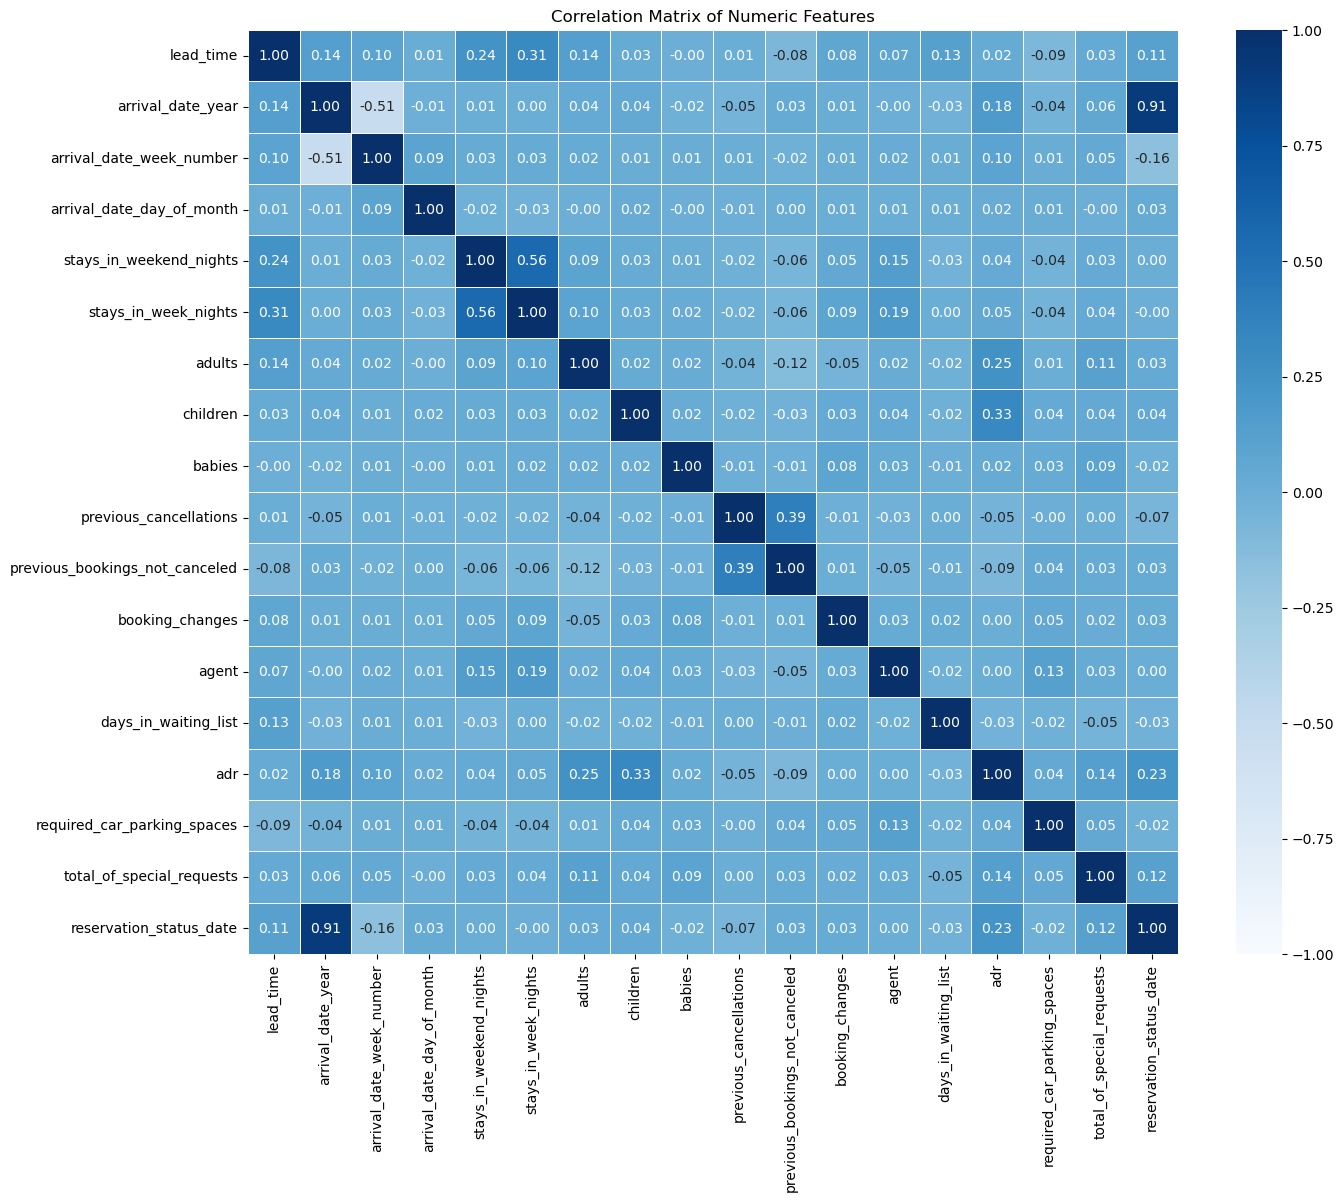

In [23]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5,cmap="Blues", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

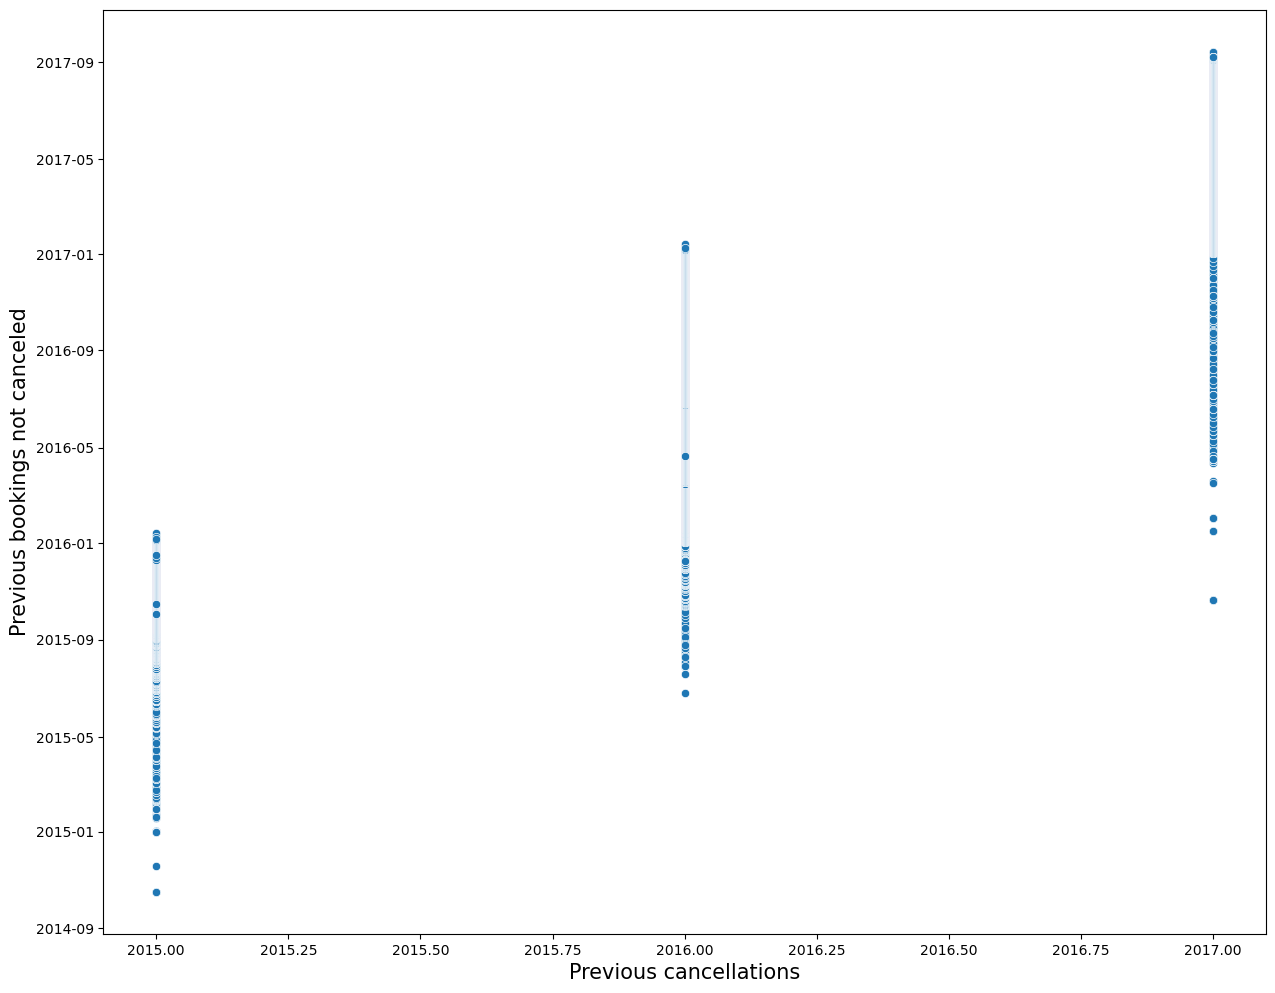

In [24]:
plt.figure(figsize=(15, 12))
sns.scatterplot(data=num_col_df, x="arrival_date_year", y="reservation_status_date")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

### **5. EDA 3D**

### **6. Insight**

#### **I.Data Understanding**
##### - Dữ liệu có 119390 hàng và 32 cột.
##### - Nhóm sẽ thực hiện việc khám phá dữ liệu thông qua việc chia theo các biến dạng Num và Cate để khám phá. Đối với các biến dạng Num, cột `company` có tỉ lệ thiếu rất cao, lên đến hơn 90% nên nhóm sẽ loại bỏ cột này. Cột `children` và `agent` cũng có tỷ lệ thiêú nhưng không đáng kể, do đó sẽ được điền bằng giá trị mode và median. Đối với các biến dáng Cat, chỉ có cột `country` là có tỉ lệ thiếu nhưng cũng khá nhỏ và sẽ được điền bằng giá trị mode của cột.
##### - Tỷ lệ trùng lặp của dữ liệu là: 26.80%, bao gồm 31994 dòng bị trùng lặp. Sau khi xử lý để loại bỏ các dòng trùng lặp, dữ liệu còn 87396 dòng và 32 cột.

Cột `country` với tỉ lệ thiếu là 0.517186% , không đáng kể, do đó nhóm sẽ  điền giá trị thiếu bằng giá trị mode của cột.